# Проект: Статистический анализ данных

В этом проекте будем работать с данными из популярного сервиса аренды самокатов GoFast. Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Нам нужно загрузить данные, выполнить предобработку, провести исследовательский анализ данных и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти. 

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

1. без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

2. с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

## Шаг 1. Загрузка данных

**Импортируем библиотеку pandas. Считаем данные из csv-файлов и сохраним в переменные**

In [2]:
try:
    users_data = pd.read_csv('users_go.csv')
    rides_data = pd.read_csv('rides_go.csv')
    subsriotions_data = pd.read_csv('subscriptions_go.csv')
except:
    users_data = pd.read_csv('/datasets/users_go.csv')
    rides_data = pd.read_csv('/datasets/rides_go.csv')
    subsriotions_data = pd.read_csv('/datasets/subscriptions_go.csv')

**Выведем первые 10 строчек каждого датафрейма и изучим общую информацию о каждом датафрейме**

In [3]:
users_data.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides_data.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subsriotions_data.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subsriotions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод:**

Мы сохранили каждый файл в переменные и прочитали данные. Затем получили общую информацию о каждой таблице:

1. В датафрейме с информацией о пользователях всего 1565 строк. Пропущенные строки отсутствуют. 
2. В датафрейме с информацией о поездах пользователей всего 18068 строк. Пропущенных значений нет. 
3. В датафпейме с информацией о подписах пользователей всего 2 строчки, так как у нас два вида подписок. Пропущенных значений нет. 

В столбце `date` таблицы `rides_data` записана дата поездки, но в формате object, поэтому необходимо поменять на datetime. Еще проверим на наличие дубликатов во всех таблицах. 

## Шаг 2. Предобработка данных

1. Приведите столбец date к типу даты pandas.
2. Создайте новый столбец с номером месяца на основе столбца date.
3. Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [9]:
rides_data['date'] = pd.to_datetime(rides_data['date'], format='%Y-%m-%d')
# проверим типы данных еще раз 
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [10]:
# создадим столбец с номером месяца
rides_data['date_month'] = rides_data['date'].dt.month

In [11]:
rides_data['date_month'].value_counts().reset_index().sort_values(by='index')

,index,date_month
0,1,1585
11,2,1336
3,3,1544
8,4,1506
1,5,1560
2,6,1553
4,7,1529
6,8,1518
7,9,1517
9,10,1475


Создали стоблец с месяцами и выяснили, что у нас все 12 месяцев есть в датасете. 

In [12]:
# проверим, есть ли пропущенные значения в таблицах
print('Пропущенные значения в users_data:')
print(users_data.isna().sum())
print()
print('Пропущенные значения в rides_data:')
print(rides_data.isna().sum())
print()
print('Пропущенные значения в subsriotions_data:')
print(subsriotions_data.isna().sum())

Пропущенные значения в users_data:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропущенные значения в rides_data:
user_id       0
distance      0
duration      0
date          0
date_month    0
dtype: int64

Пропущенные значения в subsriotions_data:
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [13]:
# проверим, есть ли дубликаты в таблицах 
print('Количество дубликатов в users_data:', users_data.duplicated().sum())
print('Количество дубликатов в rides_data:', rides_data.duplicated().sum())
print('Количество дубликатов в subsriotions_data:', subsriotions_data.duplicated().sum())

Количество дубликатов в users_data: 31
Количество дубликатов в rides_data: 0
Количество дубликатов в subsriotions_data: 0


In [14]:
# удалим дубликаты в таблице `users_data`
users_data = users_data.drop_duplicates()
print('Количество дубликатов в users_data:', users_data.duplicated().sum())

Количество дубликатов в users_data: 0


**Вывод:**

Мы изменили тип данных для столбца с датой поездки, создали столбец с номером месяца. Пропущенных значений во всех трех таблицах мы не нашли. Дубликаты были только в датафрейме `users_data`, мы их удалили. 

## Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:
1. частота встречаемости городов;
2. соотношение пользователей с подпиской и без подписки;
3. возраст пользователей;
4. расстояние, которое пользователь преодолел за одну поездку;
5. продолжительность поездок.

**Частота встречаемости городов**

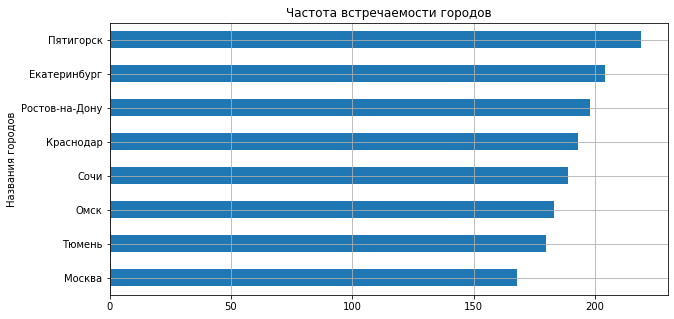

In [15]:
# построим гистограмму для частоты встречаемости городов 
users_data['city'].value_counts().sort_values(ascending=True).plot(
    y='city', kind='barh', grid=True, figsize=(10,5)
)

plt.title('Частота встречаемости городов')
plt.ylabel('Названия городов')
plt.show()

In [16]:
# частота встречаемости городов
users_data['city'].value_counts().sort_values(ascending=True)

Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: city, dtype: int64

In [17]:
users_data['city'].describe()

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

Всего 8 городов встречается в таблице. Три самых наиболее частотных городов - Пятигорск, Екатеринбург, Ростов-на-Дону. 

**Соотношение пользователей с подпиской и без подписки**

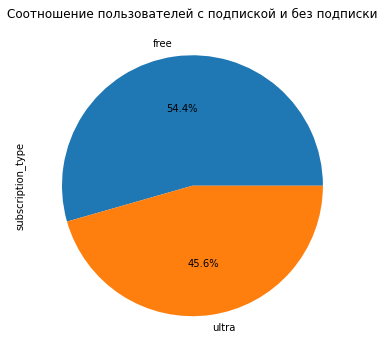

In [18]:
#построим гистограмму для соотношения пользователей с подпиской и без подписки 
users_data['subscription_type'].value_counts().plot(
    kind='pie',
    y='subscription_type',
    grid=True,
    autopct='%.1f%%',
    figsize=(9,6)
)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

В таблице больше всего пользователей без подписки (54.4%), а пользователей с подпиской меньше (45.6%). Это может быть связано с тем, что пользователи не так часто пользуются самокатами, поэтому им нет надобности оформлять подписку. 

**Возраст пользователей**

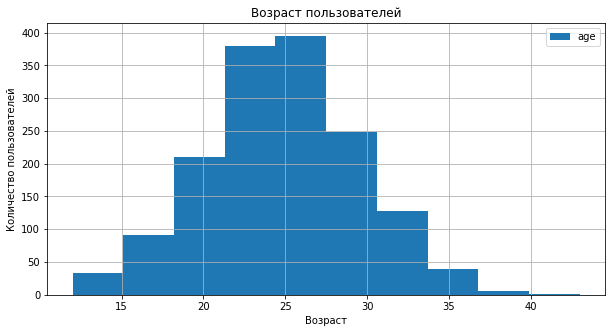

In [19]:
# построим гистограмму для возраста пользователей 
users_data.plot(
    kind='hist',
    y='age',
    grid=True,
    figsize=(10,5) 
)

plt.title('Возраст пользователей')
plt.ylabel('Количество пользователей')
plt.xlabel('Возраст')
plt.show()

In [20]:
users_data['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Возраст пользователей в среднем распределен от 15 лет до 35. Медиана - 25 лет, максимальный возраст - 43 года. Самые молодые пользователи в возрасте 12 лет. 

**Расстояние, которое пользователь преодолел за одну поездку**

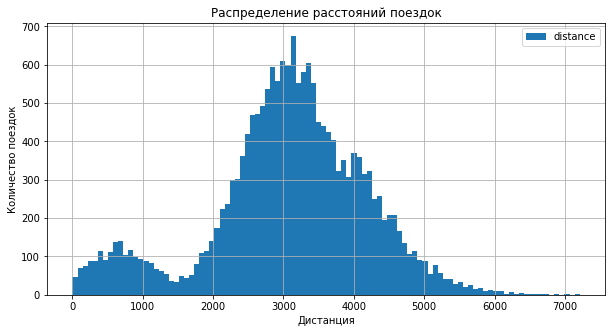

In [21]:
# построим гистограмму для расстояний поездок
rides_data.plot(
    kind='hist',
    y='distance',
    grid=True,
    figsize=(10,5),
    bins=100
)
plt.title('Распределение расстояний поездок')
plt.ylabel('Количество поездок')
plt.xlabel('Дистанция')
plt.show()

In [22]:
rides_data['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

В среднем пользователи от 2 километров до 5. Чаще всего это 3 километра. 

**Продолжительность поездок**

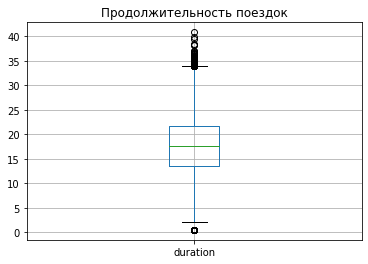

In [23]:
rides_data.boxplot(column="duration")
plt.title('Продолжительность поездок')
plt.show()

In [24]:
#найдем нижнию и верхнюю границы 
Q1 = rides_data['duration'].describe()['25%'] # первый квартиль Q1
Q3 = rides_data['duration'].describe()['75%'] # третий квартиль Q3
IQR = Q3 - Q1 # межквартильный размах IQR
lower_edge = Q1 - 1.5 * IQR
upper_edge = Q3 + 1.5 * IQR

print(lower_edge)
print(upper_edge)

1.4067070934272756
33.91565577561293


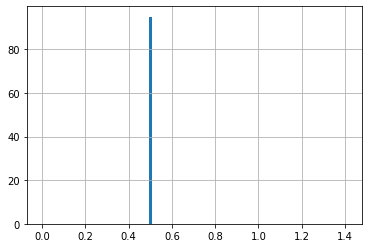

In [25]:
# посмотрим на выбросы ниже нижней границы поближе
rides_data[(rides_data['duration'] < lower_edge)]['duration'].hist(bins=100, range=(0, lower_edge))
plt.show()

У нас есть пик между 0,4 и 0,6 минутами, и попадают больше 80 поездок в этот промежуток. Не думаю, что поездка может длиться 0.5 секунд, поэтому давайте посмотрим на такие поездки и их параметры более подробно.

In [26]:
rides_data.query('duration < 1')

,user_id,distance,duration,date,date_month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Видим, что 95 поездок имеют продолжительность в 0.5 секунд, но их дистанция 4-6 километров. Наверное, произошла какая-то техническая ошибка, и время поездки не засчиталось полностью. 

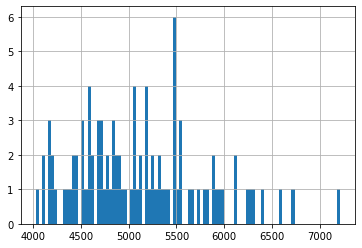

In [27]:
# давайте посмотрим на распеределение расстояний таких поездок
rides_data.query('duration < 1')['distance'].hist(bins=100)
plt.show()

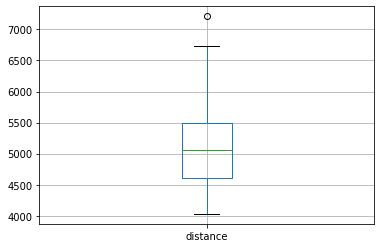

In [28]:
rides_data.query('duration < 1').boxplot(column='distance')
plt.show()

In [29]:
#найдем нижнию и верхнюю границы 
Q1 = rides_data.query('duration < 1')['distance'].describe()['25%'] # первый квартиль Q1
Q3 = rides_data.query('duration < 1')['distance'].describe()['75%'] # третий квартиль Q3
IQR = Q3 - Q1 # межквартильный размах IQR
lower_edge = Q1 - 1.5 * IQR
upper_edge = Q3 + 1.5 * IQR

print(lower_edge)
print(upper_edge)

3296.088401293647
6803.881517980524


Предлагаю найти среднее значение продолжительности времени поездок из датасета `rides_data`, где дистанция находится в промежутке от нижней границы (3296) до верхней границы (6803). Затем заполнить этим значением наши значения, где время равно 0.5. 

In [30]:
rides_data.query('3296 <= distance <= 6803')['duration'].mean()

20.606783666588296

In [31]:
rides_data.loc[rides_data['duration'] < 1, 'duration'] = rides_data.query('3296 <= distance <= 6803')['duration'].mean()

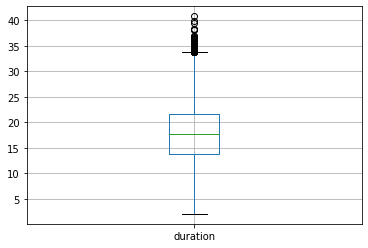

In [32]:
# проверим изменения 
rides_data.boxplot(column='duration')
plt.show()

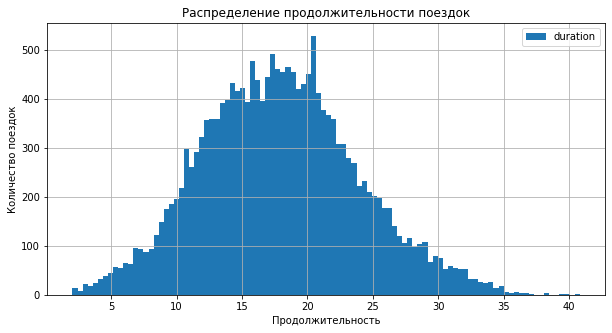

In [33]:
# теперь уже нарисуем график для времени поездок
rides_data.plot(
    kind='hist',
    y='duration',
    grid=True,
    figsize=(10,5),
    bins=100
)
plt.title('Распределение продолжительности поездок')
plt.ylabel('Количество поездок')
plt.xlabel('Продолжительность')
plt.show()

In [34]:
rides_data['duration'].describe()

count    18068.000000
mean        17.910731
std          5.962916
min          2.035632
25%         13.697117
50%         17.750643
75%         21.724800
max         40.823963
Name: duration, dtype: float64

В среднем пользователи тратят от 13 до 22 минут на поездку. Чаще всего поездка занимает около 17 минут. 

**Вывод:**

Мы описали и визуализировали общую информацию о пользователях и поездках. Нарисовали распределения для заданных параметров. 

## Шаг 4. Объединение данных 

1. Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

2. Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.
3. Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [35]:
data = users_data.merge(rides_data, on='user_id')
data = data.merge(subsriotions_data, on='subscription_type')
# выведем первые 10 строчек
data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [36]:
print('Количество строчек в датасате с поездками:', rides_data.shape[0])

print('Количество строчек в общем датасете:', data.shape[0])

Количество строчек в датасате с поездками: 18068
Количество строчек в общем датасете: 18068


In [37]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
date_month           0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Количество строк в новом датасета, где мы объединили данные, такое же, как и в датасете `rides_data`. Пропущенных значений в датасете нет. 

In [38]:
# создадим два датафрейма с подпиской и без подпиской 
data_free_subscription = data.query('subscription_type == "free"')
data_ultra_subscription = data.query('subscription_type == "ultra"')

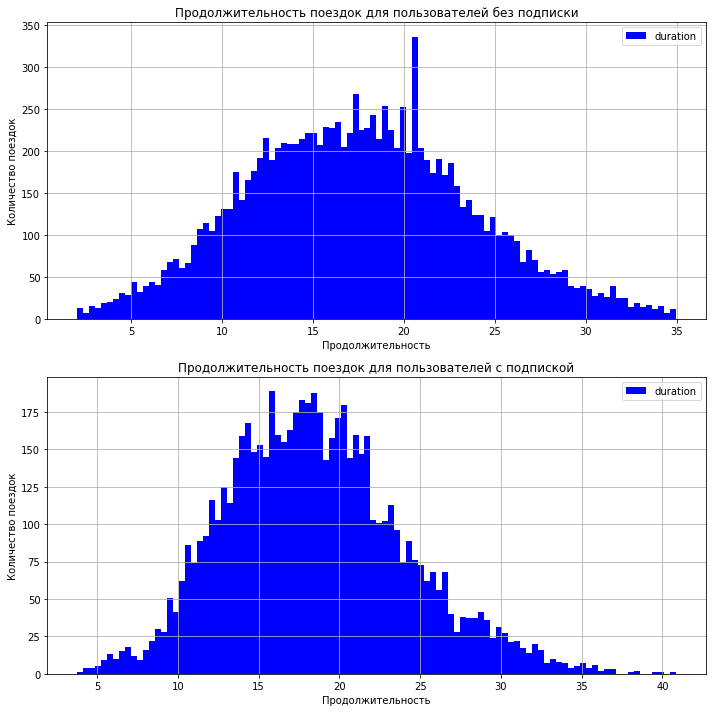

In [39]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))  

# построим гистограмму для времени поездок для пользователей без подписки 
data_free_subscription.plot(
    kind='hist',
    y='duration',
    grid=True,
    ax=axs[0],
    bins=100,
    color='blue'
)
axs[0].set_title('Продолжительность поездок для пользователей без подписки')
axs[0].set_ylabel('Количество поездок')
axs[0].set_xlabel('Продолжительность')

# построим гистограмму для времени поездок для пользователей с подпиской
data_ultra_subscription.plot(
    kind='hist',
    y='duration',
    grid=True,
    ax=axs[1],
    bins=100,
    color='blue'
)
axs[1].set_title('Продолжительность поездок для пользователей с подпиской')
axs[1].set_ylabel('Количество поездок')
axs[1].set_xlabel('Продолжительность')

plt.tight_layout()
plt.show()

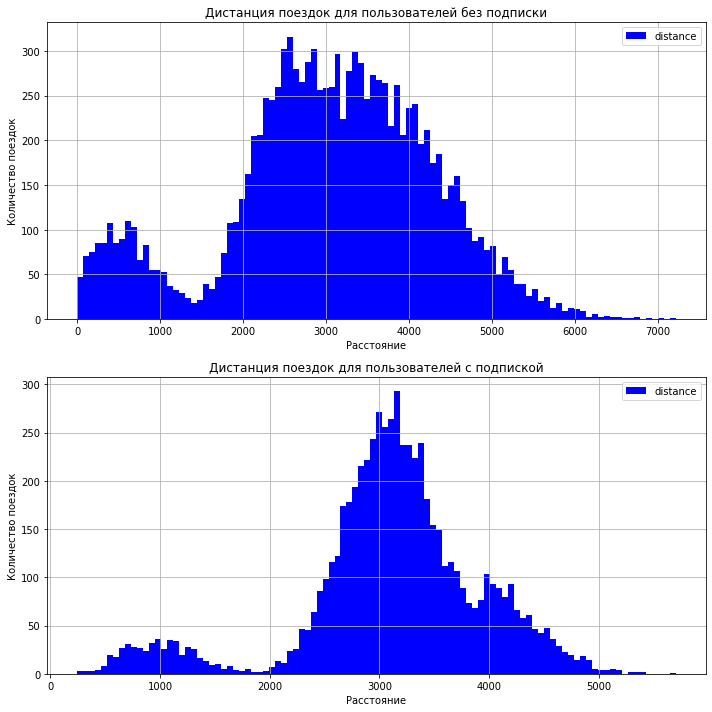

In [40]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))  

# построим гистограмму для времени поездок для пользователей без подписки 
data_free_subscription.plot(
    kind='hist',
    y='distance',
    grid=True,
    ax=axs[0],
    bins=100,
    color='blue'
)
axs[0].set_title('Дистанция поездок для пользователей без подписки')
axs[0].set_ylabel('Количество поездок')
axs[0].set_xlabel('Расстояние')

# построим гистограмму для времени поездок для пользователей с подпиской
data_ultra_subscription.plot(
    kind='hist',
    y='distance',
    grid=True,
    ax=axs[1],
    bins=100,
    color='blue'
)
axs[1].set_title('Дистанция поездок для пользователей с подпиской')
axs[1].set_ylabel('Количество поездок')
axs[1].set_xlabel('Расстояние')

plt.tight_layout()
plt.show()

1. Для пользователей без подписки в среднем продолжительность поездки составляет от 12 до 21 минуты, а расстояние - от 2,3 километров до 4. 
2. Для пользователей с подпиской в среднем продолжительность поездки составляет от 14 до 21 минут, а расстояние - 2.7 километров до 3,5. 

**Вывод:**

Создали общий датафрейм `data`, где объединили данные о пользователях, поездках и подписках. Создали два отдельных датасета `data_free_subscription` c данными о пользователях без подписки и `data_ultra_subscription` с данными о пользователях с подпиской. Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий.

Мне кажется, что сильных различий между двух групп нет, продолжительность и расстояние поездок почти одинаковы. 

## Шаг 5. Подсчёт выручки

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [41]:
# округлим продолжительность поездок до целого числа 
data['duration'] = np.ceil(data['duration'])

In [42]:
data_pivot_table = pd.pivot_table(data,
                           index=['date_month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})

data_pivot_table.rename(columns = {
    'name' : 'total_rides', 'distance' : 'total_distance', 'duration' : 'total_duration'}, inplace = True)
data_pivot_table.head(10)

total_distance  total_duration  total_rides  \
date_month user_id                                                
1          1           7027.511294            42.0            2   
           3           3061.777147            13.0            1   
           5           3914.646990            13.0            1   
           7           6478.080979            28.0            2   
           12          3577.151148            33.0            1   
           13          6687.987446            42.0            2   
           14          7699.643820            35.0            2   
           15          4187.621459            39.0            1   
           20          3516.719208            29.0            1   
           22          3058.692225            13.0            1   

                   subscription_type  
date_month user_id                    
1          1                   ultra  
           3                   ultra  
           5                   ultra  
           7                   ultra  
           12                  ultra  
           13                  ultra  
           14                  ultra  
           15                  ultra  
           20                  ultra  
           22                  ultra

Перед тем, как посчитать месячную выручку каждого пользователя, давайте вспомним, какой тариф у пользователей с подпиской или без: 

1. без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

2. с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.


In [43]:
def month_revenue(row):
    if row['subscription_type'] == 'free':
        return 8 * row['total_duration'] + 50 * row['total_rides']
    elif row['subscription_type'] == 'ultra':
        return 6 * row['total_duration'] + 199
    else:
        return ''

In [44]:
data_pivot_table['month_revenue'] = data_pivot_table.apply(month_revenue, axis=1)
data_pivot_table

total_distance  total_duration  total_rides  \
date_month user_id                                                
1          1           7027.511294            42.0            2   
           3           3061.777147            13.0            1   
           5           3914.646990            13.0            1   
           7           6478.080979            28.0            2   
           12          3577.151148            33.0            1   
...                            ...             ...          ...   
12         1525        4597.854350            34.0            1   
           1526        3644.121544            23.0            1   
           1528        3998.569324            11.0            1   
           1532        6111.889853            42.0            2   
           1534        2371.711192            16.0            1   

                   subscription_type  month_revenue  
date_month user_id                                   
1          1                   ultra          451.0  
           3                   ultra          277.0  
           5                   ultra          277.0  
           7                   ultra          367.0  
           12                  ultra          397.0  
...                              ...            ...  
12         1525                 free          322.0  
           1526                 free          234.0  
           1528                 free          138.0  
           1532                 free          436.0  
           1534                 free          178.0  

[11331 rows x 5 columns]

**Вывод:**

Мы создали датафрейм с агрегированными данными о поездках `data_pivot_table`, куда записали суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также в этот же датафрейм добавили столбец с помесячной выручкой, которую принёс каждый пользователь, при этом округлили продолжительность поездок. 

## Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Первый пункт:**

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

H_0: время, которое тратят пользователи с подпиской, равно времени, которое тратят пользователи без подписки 

H_1: время, которое тратят пользователи с подпиской, больше, чем время, которое тратят пользователи без подпиской 

Гипотеза правостороняя, воспользуемся методом `ttest_ind()` с параметром `alternative`, равным `greater`

In [45]:
# задаём уровень значимости
alpha = 0.05

results = st.ttest_ind(data_ultra_subscription['duration'], data_free_subscription['duration'],
                        alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 6.108771653732858e-27
Отвергаем нулевую гипотезу


p-value оказалось меньше, чем уровень стат.значимости, поэтому отвергаем нулевую гипотезу в пользу альтернативной. Есть основания говорить, что пользователи с подпиской тратят больше времени, чем пользователи без подписки. 

**Второй пункт:**

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

H_0: расстояние одной поездки пользователей с подпиской РАВНО 3130 метров

H_1: расстояние одной поездки пользователей с подпиской БОЛЬШЕ, ЧЕМ 3130 метров

Гипотеза правосторонняя, воспользуемся методом `ttest_1samp()` с параметром `alternative`, равным `greater`

In [46]:
optimal_value = 3130 # оптимальное расстояние одной поездки 
alpha = 0.05 # уровень статистической значимости
            # можно указать .05 или 0.05

results = st.ttest_1samp(
    data_ultra_subscription['distance'], 
    optimal_value,
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


p-value оказалось больше, чем уровень статистической значимости, поэтому нулевая гипотеза не отвергается. Можно сказать, что среднее расстояние, которое проезжают пользователи с подпиской, может быть равно 3130 метров. 

**Третий пункт:**

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

H_0: помесячная выручка от пользователей с подпиской РАВНА помесячной выручке от пользователей без подписки

H_1: помесячная выручка от пользователей с подпиской БОЛЬШЕ, ЧЕМ помесячной выручке от пользователей без подписки

Гипотеза правостороняя, воспользуемся методом `ttest_ind()` с параметром `alternative`, равным `greater`

In [47]:
free_sub_revenue = data_pivot_table.query('subscription_type == "free"')
ultra_sub_revenue = data_pivot_table.query('subscription_type == "ultra"')

# задаём уровень значимости
alpha = 0.05

results = st.ttest_ind(ultra_sub_revenue['month_revenue'], free_sub_revenue['month_revenue'],
                        alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2510504411828254e-27
Отвергаем нулевую гипотезу


p-value оказалось меньше, чем уровень статистической значимости, поэтому отвергаем нулевую гипотезу в пользу альтернативной. У нас есть основания сказать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

**Пункт четвертый:**

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?


Думаю, что здесь гипотеза о равенстве средних для зависимых (парных) выборок. Выборки будут парными, потому что некоторая переменная измеряется дважды для одних и тех же объектов. 

Гипотеза будет сформулирована так:

H0: μ1=μ2 (количество обращений осталось таким же, как и было до изменений)

H1: μ2<μ1 (количество обращений после изменений стало меньше, чем прежде)

где μ1​ и μ2​ — средние значения до и после изменений.

Применим метод `scipy.stats.ttest_rel()`, которому передадим два параметра: набор данных до и после изменений. Гипотеза односторонняя.

**Вывод:**

В ходе шестого шага мы проверили гипотезы и получили:

1. пользователи с подпиской тратят больше времени, чем пользователи без подписки;
2. среднее расстояние, которое проезжают пользователи с подпиской, может быть равно 3130 метрам;
3. помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

## Шаг 7. Общий вывод

Мы загрузили три датафрейма и изучили общую информацию о них. 

**Предобработка данных:**
- привели столбец date к корректному типу даты;
- создали новый столбец с номером месяца на основе столбца date;
- пропущенных значений в датафреймах не нашли
- удалили дубликаты в таблице с информацией о пользователях

**Исследовательский анализ данных:**
- описали и визуализировали общую информацию о пользователях и поездках;
- три самых наиболее частотных городов по количеству пользователей - Пятигорск, Екатеринбург, Ростов-на-Дону;
- больше всего пользователей без подписки
- возраст пользователей в среднем распределен от 20 до 30 лет;
- в основном пользователи проезжают от 2 до 5 километров;
- пользователи чаще всего тратят от 13 минут до 22 на поездку;

**Объединение данных:**
- объединили все три датасета в один большой `data`
- создали два отдельных датасета с данными о пользователях без подписки  и с подпиской и : `data_free_subcribtion`и `data_ultra_subcribtion`;
- визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий;
- для пользователей без подписки в среднем продолжительность поездки составляет от 12 до 21 минуты, а расстояние - от 2,3 километров до 4; 
- для пользователей с подпиской в среднем продолжительность поездки составляет от 14 до 21 минут, а расстояние - 2.7 километров до 3,5. 

**Подсчёт выручки:**
- создали датафрейм `data_pivot_table` с агрегированными данными о поездках на основе датафрейма с объединёнными данными: нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц;
- добавили столбец с помесячной выручкой, которую принёс каждый пользователь

**Проверка гипотез:**
- сформулировали гипотезы и проверили их на тестах;
- пользователи с подпиской тратят больше времени, чем пользователи без подписки;
- среднее расстояние, которое проезжают пользователи с подпиской, может быть равно 3130 метрам;
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Пользователи с подпиской являются более "выгодными" для компании: они тратят больше времени на поездку, чем пользователи без подписки, и их месячная выручка выше, чем от пользователей без подписки. 